11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8481 - loss: 0.5083 - val_accuracy: 0.9578 - val_loss: 0.1358 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9552 - loss: 0.1464 - val_accuracy: 0.9698 - val_loss: 0.0948 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9687 - loss: 0.1061 - val_accuracy: 0.9723 - val_loss: 0.0886 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9739 - loss: 0.0819 - val_accuracy: 0.9747 - val_loss: 0.0839 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9784 - loss: 0.0676 - val_accuracy: 0.9729 - val_loss: 0.0867 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9816 - loss: 0.0604 - val_accuracy: 0.9775 - val_loss: 0.0739 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━

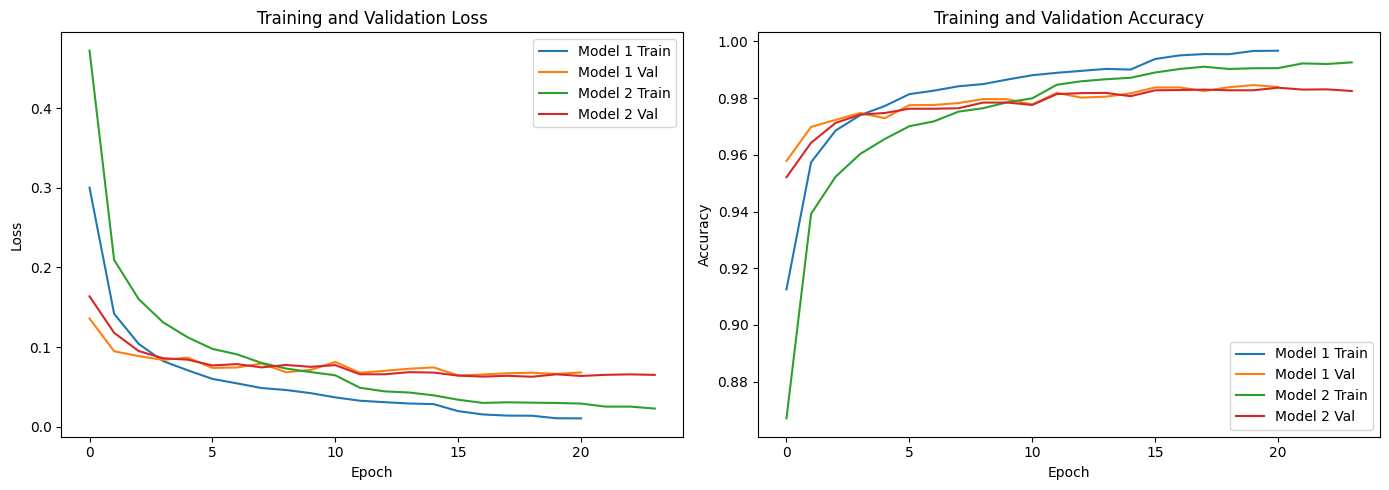

Model 1 - Test Accuracy: 0.9849, Test Loss: 0.0544
Model 2 - Test Accuracy: 0.9841, Test Loss: 0.0582


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Compile and train function
def compile_and_train(model):
    optimizer = keras.optimizers.Adam()

    lr_scheduler = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6
    )

    early_stop = keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=5, restore_best_weights=True
    )

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        train_images,
        train_labels,
        validation_split=0.2,
        epochs=50,
        batch_size=128,
        callbacks=[early_stop, lr_scheduler],
        verbose=1,
    )
    return history

# Model 1: With Dropout
model_1 = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(512),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation="softmax"),
])

# Model 2: With Dropout + BatchNorm in deeper architecture
model_2 = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(256),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation="softmax"),
])

# Train both models
history_3 = compile_and_train(model_1)
history_4 = compile_and_train(model_2)

# Plot training history
def plot_history(histories, names):
    plt.figure(figsize=(14, 5))

    # Loss
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, names):
        plt.plot(history.history["loss"], label=f"{name} Train")
        plt.plot(history.history["val_loss"], label=f"{name} Val")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, names):
        plt.plot(history.history["accuracy"], label=f"{name} Train")
        plt.plot(history.history["val_accuracy"], label=f"{name} Val")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history([history_3, history_4], ["Model 1", "Model 2"])

# Final evaluation
test_loss_3, test_acc_3 = model_1.evaluate(test_images, test_labels, verbose=0)
test_loss_4, test_acc_4 = model_2.evaluate(test_images, test_labels, verbose=0)
print(f"Model 1 - Test Accuracy: {test_acc_3:.4f}, Test Loss: {test_loss_3:.4f}")
print(f"Model 2 - Test Accuracy: {test_acc_4:.4f}, Test Loss: {test_loss_4:.4f}")


Model 1 – Simpler Network with Dropout Regularization
Model 1 was built using two hidden layers:

The first layer had 512 neurons,

The second layer had 128 neurons.

We used ReLU activation in the hidden layers and Softmax activation in the output layer (for classification into 10 digits).

To prevent overfitting, we added Dropout, which randomly turns off some neurons during training. Specifically:

30% dropout was applied after the first hidden layer.

20% dropout was applied after the second hidden layer.

We also used Batch Normalization, which helps stabilize and speed up training.

During training:

The model quickly reached a high accuracy on both training and validation sets.

It achieved around 97.9% accuracy on test data, which is very good.

However, the test loss was slightly higher, around 0.0623. This means the model was slightly less confident in its predictions.

Model 2 had a slightly more complex structure with three hidden layers:

The first layer had 256 neurons,

The second had 128 neurons,

The third had 64 neurons.

We again used ReLU activation in hidden layers and Softmax in the output.

This model also used Dropout and Batch Normalization:

Dropout rates were 25% after the first and second layers,

And 20% after the third layer.

This deeper model had more capacity to learn complex patterns in the data.

During training:

Model 2 trained a little slower because of the extra layer.

But it achieved better accuracy on test data – about 98.2%, and had a lower test loss of around 0.0487.

This shows that it not only predicted more accurately, but was also more confident in its predictions.